In [1]:
# Required Libraries
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # For a better-looking confusion matrix

In [2]:
# Load and preprocess the images
def load_images_from_folder(folder, label):
    data = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            resized_img = cv2.resize(img, (128, 128))
            data.append([resized_img, label])
    return data

In [3]:
# Paths to the datasets
pneumonia_path = r"C:\Users\Karan's\Desktop\Project files\Dataset\PNEUMONIA"
normal_path = r"C:\Users\Karan's\Desktop\Project files\Dataset\NORMAL"

pneumonia_data = load_images_from_folder(pneumonia_path, 1)
normal_data = load_images_from_folder(normal_path, 0)

In [4]:
# Combine and shuffle the data
all_data = pneumonia_data + normal_data
np.random.shuffle(all_data)

X = []
y = []

for features, label in all_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, 128, 128, 1)
y = np.array(y)

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
21/21 [==============================] - 6s 236ms/step - loss: 0.6711 - accuracy: 0.6114 - val_loss: 0.6893 - val_accuracy: 0.5399
Epoch 2/10
21/21 [==============================] - 5s 217ms/step - loss: 0.6502 - accuracy: 0.6298 - val_loss: 0.6691 - val_accuracy: 0.5399
Epoch 3/10
21/21 [==============================] - 4s 212ms/step - loss: 0.6178 - accuracy: 0.6375 - val_loss: 0.6164 - val_accuracy: 0.5767
Epoch 4/10
21/21 [==============================] - 4s 212ms/step - loss: 0.5359 - accuracy: 0.7327 - val_loss: 0.5171 - val_accuracy: 0.8712
Epoch 5/10
21/21 [==============================] - 5s 218ms/step - loss: 0.4958 - accuracy: 0.7834 - val_loss: 0.5761 - val_accuracy: 0.6503
Epoch 6/10
21/21 [==============================] - 4s 212ms/step - loss: 0.3931 - accuracy: 0.8418 - val_loss: 0.3957 - val_accuracy: 0.8098
Epoch 7/10
21/21 [==============================] - 4s 214ms/step - loss: 0.3282 - accuracy: 0.8756 - val_loss: 0.3830 - val_accuracy: 0.8098
Epoch 

In [9]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

6/6 [==============================] - 0s 35ms/step
[[65 10]
 [ 6 82]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        75
           1       0.89      0.93      0.91        88

    accuracy                           0.90       163
   macro avg       0.90      0.90      0.90       163
weighted avg       0.90      0.90      0.90       163



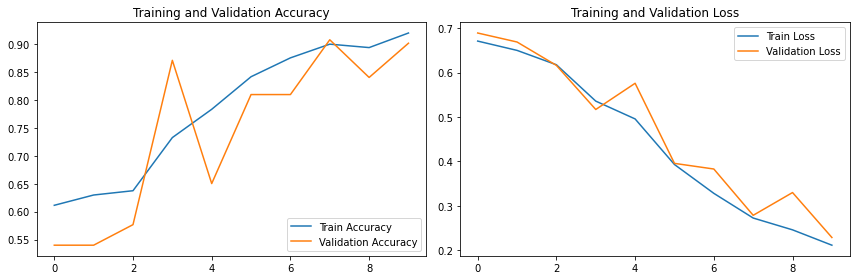

In [10]:
# Plotting training accuracy and loss
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = [1 if p > 0.5 else 0 for p in y_pred]

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

6/6 [==============================] - 0s 35ms/step
[[65 10]
 [ 6 82]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        75
           1       0.89      0.93      0.91        88

    accuracy                           0.90       163
   macro avg       0.90      0.90      0.90       163
weighted avg       0.90      0.90      0.90       163



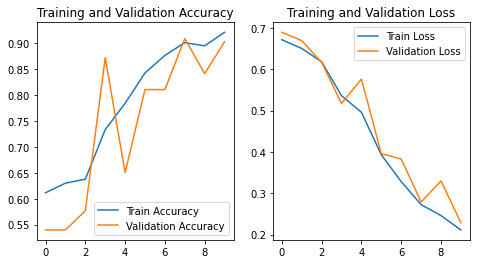

In [12]:
# Plotting training accuracy and loss
plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

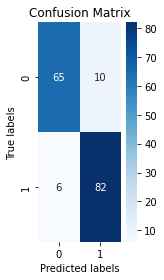

In [13]:
# Plotting confusion matrix using seaborn
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

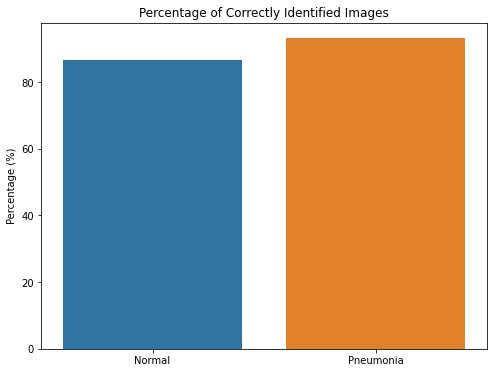

In [14]:
# Bar graph comparing percentages of correctly identified normal and pneumonia images
correctly_identified = [cm[i][i] for i in range(2)]
labels = ['Normal', 'Pneumonia']
percentages = [(i / sum(cm[j]) * 100) for j, i in enumerate(correctly_identified)]

plt.figure(figsize=(8,6))
sns.barplot(x=labels, y=percentages)
plt.ylabel('Percentage (%)')
plt.title('Percentage of Correctly Identified Images')
plt.show()

In [15]:
model.save("CNN_Model.h5")

------------------------------------------------------------------------------------------